### 1.1 install dependencies and setup

In [1]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip list

Package                     Version
--------------------------- ---------------
absl-py                     2.1.0
aiohttp                     3.9.3
aiosignal                   1.3.1
altair                      5.2.0
anyio                       4.2.0
argon2-cffi                 23.1.0
argon2-cffi-bindings        21.2.0
arrow                       1.3.0
asttokens                   2.4.1
astunparse                  1.6.3
async-lru                   2.0.4
attrs                       23.2.0
Babel                       2.14.0
beautifulsoup4              4.12.3
bleach                      6.1.0
blinker                     1.7.0
cachetools                  5.3.2
certifi                     2024.2.2
cffi                        1.16.0
charset-normalizer          3.3.2
click                       8.1.7
colorama                    0.4.6
comm                        0.2.1
contourpy                   1.2.1
cycler                      0.12.1
dataclasses-json            0.5.14
debugpy                  


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import os

In [5]:
os.path.join("data", "happy")

'data\\happy'

In [6]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '154006829.jpg',
 '8iAb9k4aT.jpg',
 'data',
 'Getting Started.ipynb',
 'Happy-Guy.jpg',
 'logs',
 'main.ipynb',
 'models',
 'README.md']

In [7]:
os.listdir("data")

['happy', 'sad']

In [8]:
cpus = tf.config.experimental.list_physical_devices("CPU")
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
gpus = tf.config.experimental.list_physical_devices("GPU")
gpus

[]

In [10]:
#Avoid OOM Errors by setting GPU memory consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### 1.2 Remove Dodge imgages


In [11]:
import cv2
# import imghdr
from PIL import Image
from matplotlib import pyplot as plt 

In [12]:
data_dir = 'data'

In [13]:
os.listdir(data_dir)

['happy', 'sad']

In [14]:
# os.listdir(os.path.join(data_dir,'happy'))

In [15]:
image_exts = ['jpeg','jpg','bmp','png']
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [16]:
# image_exts[2]

In [17]:
# for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir,image_class)):
#         print(image)

In [18]:
# img = cv2.imread(os.path.join('data','happy','154006829.jpg'))
# img

In [19]:
# img.shape

In [20]:
# plt.imshow(img)

In [21]:
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [22]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = Image.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\05-12-21-happy-people.jpg
Issue with image data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image data\happy\1-2.jpg
Issue with image data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image data\happy\154006829.jpg
Issue with image data\happy\170404-happy-workers-feature.jpg
Issue with image data\happy\1902539.jpg
Issue with image data\happy\1902540.jpg
Issue with image data\happy\1902587.jpg
Issue with image data\happy\1920px-face-smile.svg_.png.jpg
Issue with image data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image data\happy\7-Habits-of-Happy-People-image.jpeg
Issue with image data\happy\7-principles-of-successful-and-happy-people.png
Issue with image data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
Issue with image data\happy\8cxKy5g9i.jpg
Issue w

### 1.3 load data

In [23]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [24]:
import numpy as np
from matplotlib import pyplot as plt

In [25]:
# tf.keras.utils.image_dataset_from_directory??

In [26]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 171 files belonging to 2 classes.


In [27]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:

data_iterator = data.as_numpy_iterator()

In [29]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000022F93967740>)

In [30]:
#Get another batch
batch = data_iterator.next()

In [31]:
batch

(array([[[[1.87888672e+02, 1.87888672e+02, 1.87888672e+02],
          [1.84554688e+02, 1.84554688e+02, 1.84554688e+02],
          [1.80628906e+02, 1.80628906e+02, 1.80628906e+02],
          ...,
          [1.79484375e+02, 1.79484375e+02, 1.79484375e+02],
          [1.78000000e+02, 1.78000000e+02, 1.78000000e+02],
          [1.78000000e+02, 1.78000000e+02, 1.78000000e+02]],
 
         [[1.87888672e+02, 1.87888672e+02, 1.87888672e+02],
          [1.84554688e+02, 1.84554688e+02, 1.84554688e+02],
          [1.80735092e+02, 1.80735092e+02, 1.80735092e+02],
          ...,
          [1.79272003e+02, 1.79272003e+02, 1.79272003e+02],
          [1.78000000e+02, 1.78000000e+02, 1.78000000e+02],
          [1.78000000e+02, 1.78000000e+02, 1.78000000e+02]],
 
         [[1.87888672e+02, 1.87888672e+02, 1.87888672e+02],
          [1.84586655e+02, 1.84586655e+02, 1.84586655e+02],
          [1.81101562e+02, 1.81101562e+02, 1.81101562e+02],
          ...,
          [1.81291840e+02, 1.81291840e+02, 1.8129

In [32]:
len(batch)

2

In [33]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [34]:
# Class 1 = SAD PPl
# Class 0 = HAPPY PPL
batch[1]

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1])

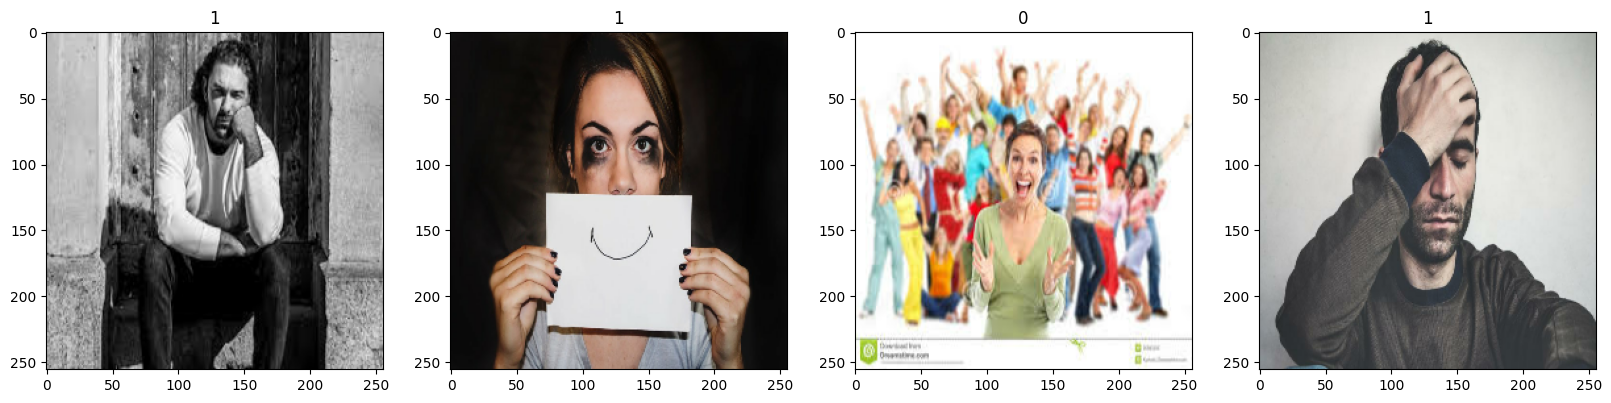

In [35]:
fig, ax = plt.subplots(ncols =4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [36]:
scaled = batch[0] /255


In [37]:
scaled.min()

0.0

In [38]:
scaled.max()

1.0

# 2. Preprocess Data

### 2.1 Scale Data

In [39]:
data = data.map(lambda x,y:(x/255,y))

In [40]:
scaled_iterator = data.as_numpy_iterator()

In [41]:
batch = scaled_iterator.next()

In [42]:
batch[0].min()

0.0

In [43]:
batch[0].max()

1.0

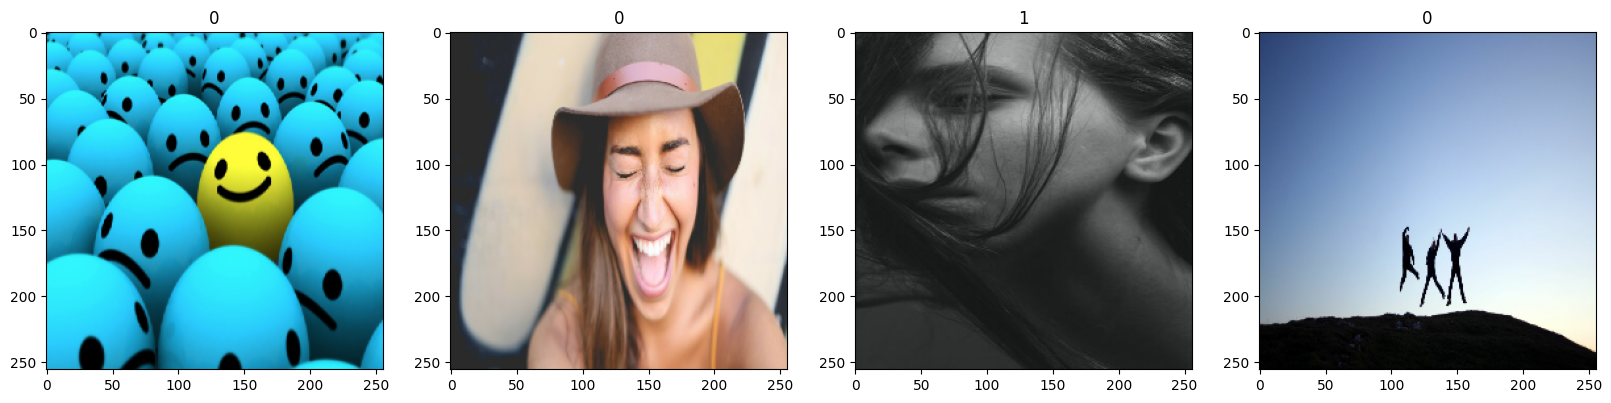

In [44]:
fig, ax = plt.subplots(ncols =4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2 split Data

In [45]:
len(data)

6

In [46]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [47]:
train_size

4

In [48]:
val_size

1

In [49]:
test_size

1

In [50]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. Deep Model

### 3.1 Build Deep learning model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [52]:
model = Sequential()

In [53]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\adamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### 3.2 Train

In [56]:
logdir='logs'

In [57]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [58]:
hist = model.fit(train, epochs=200, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 476ms/step - accuracy: 0.5708 - loss: 0.9279 - val_accuracy: 0.5000 - val_loss: 0.8117
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step - accuracy: 0.6417 - loss: 0.6441 - val_accuracy: 0.7812 - val_loss: 0.5811
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 396ms/step - accuracy: 0.6823 - loss: 0.6145 - val_accuracy: 0.5625 - val_loss: 0.6017
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step - accuracy: 0.6687 - loss: 0.5565 - val_accuracy: 0.7188 - val_loss: 0.5521
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - accuracy: 0.7479 - loss: 0.5003 - val_accuracy: 0.9062 - val_loss: 0.4166
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 419ms/step - accuracy: 0.8344 - loss: 0.4212 - val_accuracy: 0.9375 - val_loss: 0.2557
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 473ms/step - accuracy: 0.8677 - loss: 0.3276 - val_accuracy: 0.9375 - val_loss: 0.2645
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.8562 - loss: 0.2816 - val_accuracy: 0.9375 - v

### 3.3 Plot Performance

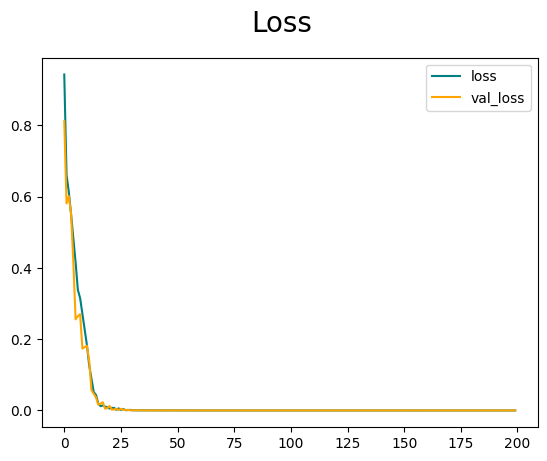

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'],color ='orange', label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc = "upper right")
plt.show()

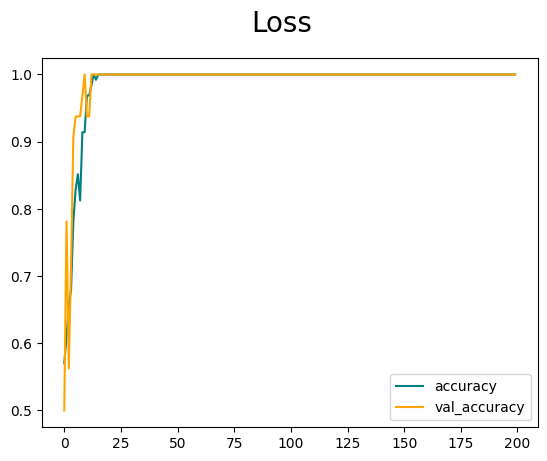

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color ='orange', label = 'val_accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc = "lower right")
plt.show()

# 4. Evaluate Performance

### 4.1 Evaluate 

In [61]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [62]:
pre = Precision()
re =  Recall()
acc = BinaryAccuracy()

In [63]:
len(test)

1

In [64]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat =model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [65]:
print(f'Precision: {pre.result().numpy()},Recall: {re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision: 1.0,Recall: 1.0,Accuracy:1.0


### 4.2 Test

In [79]:
import cv2

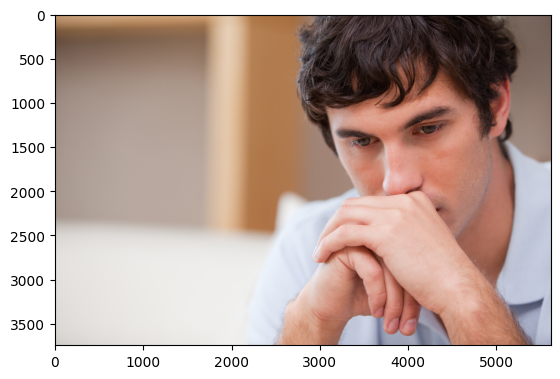

In [80]:
img = cv2.imread('Sad-Guy.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

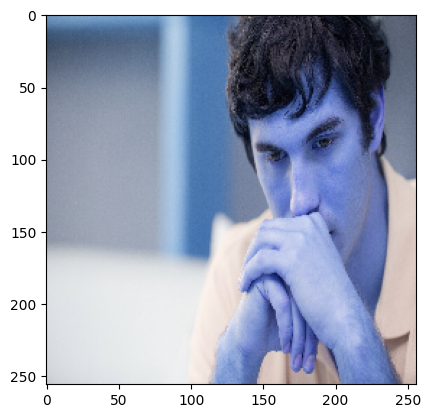

In [81]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [82]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[115.01953 , 150.63867 , 190.63867 ],
        [117.32422 , 153.88672 , 193.69922 ],
        [118.16211 , 153.84375 , 193.28516 ],
        ...,
        [ 85.94336 ,  95.59961 , 114.28711 ],
        [ 79.359375,  90.546875, 108.546875],
        [ 82.35547 ,  92.35547 , 110.35547 ]],

       [[108.06445 , 147.06445 , 186.06445 ],
        [112.853516, 151.85352 , 190.85352 ],
        [116.58594 , 153.03711 , 192.88672 ],
        ...,
        [ 83.58789 ,  93.58789 , 111.58789 ],
        [ 85.48047 ,  92.6543  , 111.42578 ],
        [ 83.68359 ,  90.41992 , 109.41992 ]],

       [[106.62695 , 145.62695 , 184.62695 ],
        [110.54297 , 149.54297 , 188.54297 ],
        [109.30859 , 145.3086  , 185.3086  ],
        ...,
        [ 86.21875 ,  96.21875 , 114.21875 ],
        [ 84.1543  ,  94.1543  , 112.1543  ],
        [ 83.703125,  93.703125, 111.703125]],

       ...,

       [[199.52734 , 203.52734 , 208.52734 ],
        [203.

In [83]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [84]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [85]:
yhat

array([[0.9999954]], dtype=float32)

In [86]:
if yhat > 0.5:
    print(f'Predicted Class is sad')
else:
    print(f'Predicted Class is Happy')

Predicted Class is sad


# 5. Save the Model

### 5.1 Save the Model

In [87]:
from tensorflow.keras.models import load_model

In [88]:
model.save(os.path.join('models','happysadmodel.h5'))

In [89]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [90]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [91]:
if yhat_new > 0.5:
    print(f'Predicted Class is sad')
else:
    print(f'Predicted Class is Happy')

Predicted Class is sad
